In [1]:
# Install PyPDF2
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


In [5]:
import os

# Path to the main 'data' folder in Google Drive
data_folder_path = '/content/drive/My Drive/data'

# Initialize lists to store subfolder names and PDF file paths
subfolders = []
pdf_files = []

# Walk through all subfolders and files
for root, dirs, files in os.walk(data_folder_path):
    # Collect subfolder names
    for dir_name in dirs:
        subfolders.append(os.path.join(root, dir_name))

    # Collect PDF file paths
    for file in files:
        if file.endswith('.pdf'):
            pdf_files.append(os.path.join(root, file))

# Display subfolders
print(f"Total subfolders found: {len(subfolders)}")
print("Subfolders:", subfolders)

# Display PDFs
print(f"\nTotal PDFs found: {len(pdf_files)}")
print("Sample PDFs:", pdf_files[:5])


Total subfolders found: 23
Subfolders: ['/content/drive/My Drive/data/DESIGNER', '/content/drive/My Drive/data/SALES', '/content/drive/My Drive/data/DIGITAL-MEDIA', '/content/drive/My Drive/data/TEACHER', '/content/drive/My Drive/data/HR', '/content/drive/My Drive/data/PUBLIC-RELATIONS', '/content/drive/My Drive/data/FITNESS', '/content/drive/My Drive/data/ENGINEERING', '/content/drive/My Drive/data/HEALTHCARE', '/content/drive/My Drive/data/FINANCE', '/content/drive/My Drive/data/BPO', '/content/drive/My Drive/data/AVIATION', '/content/drive/My Drive/data/APPAREL', '/content/drive/My Drive/data/CHEF', '/content/drive/My Drive/data/BANKING', '/content/drive/My Drive/data/ARTS', '/content/drive/My Drive/data/CONSTRUCTION', '/content/drive/My Drive/data/BUSINESS-DEVELOPMENT', '/content/drive/My Drive/data/AUTOMOBILE', '/content/drive/My Drive/data/CONSULTANT', '/content/drive/My Drive/data/ACCOUNTANT', '/content/drive/My Drive/data/AGRICULTURE', '/content/drive/My Drive/data/ADVOCATE']



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

# Load CSV into pandas dataframe
for file_name in uploaded.keys():
    csv_file = file_name

df = pd.read_csv(csv_file)
print(f"CSV file loaded: {csv_file}")
print(df.head())  # Show first 5 rows


Saving clean_resume_data.csv to clean_resume_data.csv
CSV file loaded: clean_resume_data.csv
         ID Category                                            Feature
0  16852973       HR  hr administrator marketing associate hr admini...
1  22323967       HR  hr specialist hr operations summary media prof...
2  33176873       HR  hr director summary years experience recruitin...
3  27018550       HR  hr specialist summary dedicated driven dynamic...
4  17812897       HR  hr manager skill highlights hr skills hr depar...


In [7]:
!pip install PyPDF2


In [10]:
import PyPDF2

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page].extract_text() or ""
    return text.strip()

# Test on the first 3 PDFs
pdf_texts = {}

for pdf_file in pdf_files[:3]:
    pdf_path = os.path.join(pdf_folder_path, pdf_file)
    pdf_texts[pdf_file] = extract_text_from_pdf(pdf_path)

# Show extracted text (first 500 characters for each PDF)
for file, text in pdf_texts.items():
    print(f"--- {file} ---\n{text[:500]}\n{'-'*50}\n")


NameError: name 'pdf_folder_path' is not defined

In [9]:
import pandas as pd

# Convert PDF data to a dataframe
pdf_data = pd.DataFrame(list(pdf_texts.items()), columns=["File Name", "Extracted Text"])
print(pdf_data.head())


Empty DataFrame
Columns: [File Name, Extracted Text]
Index: []


In [11]:
# Show the CSV structure again
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Fill NaN values if any (adjust as needed)
df = df.fillna("")


         ID Category                                            Feature
0  16852973       HR  hr administrator marketing associate hr admini...
1  22323967       HR  hr specialist hr operations summary media prof...
2  33176873       HR  hr director summary years experience recruitin...
3  27018550       HR  hr specialist summary dedicated driven dynamic...
4  17812897       HR  hr manager skill highlights hr skills hr depar...
ID          0
Category    0
Feature     1
dtype: int64


In [12]:
# Add a "Source" column to both datasets
df["Source"] = "CSV"
pdf_data["Source"] = "PDF"


In [13]:
# Add placeholder columns to PDFs for merging
pdf_data["ID"] = pdf_data["File Name"]
pdf_data["Category"] = ""  # We'll categorize later
pdf_data.rename(columns={"Extracted Text": "Feature"}, inplace=True)

# Reorder columns to match the CSV
pdf_data = pdf_data[["ID", "Category", "Feature", "Source"]]
print(pdf_data.head())


Empty DataFrame
Columns: [ID, Category, Feature, Source]
Index: []


In [14]:
# Combine CSV and PDF data into one dataframe
combined_data = pd.concat([df[["ID", "Category", "Feature", "Source"]], pdf_data], ignore_index=True)

print(f"Total records: {len(combined_data)}")
print(combined_data.head())


Total records: 2484
         ID Category                                            Feature Source
0  16852973       HR  hr administrator marketing associate hr admini...    CSV
1  22323967       HR  hr specialist hr operations summary media prof...    CSV
2  33176873       HR  hr director summary years experience recruitin...    CSV
3  27018550       HR  hr specialist summary dedicated driven dynamic...    CSV
4  17812897       HR  hr manager skill highlights hr skills hr depar...    CSV


In [15]:
!pip install nltk


In [16]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download("stopwords")

# Get the list of English stopwords
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # Remove stopwords
    words = text.split()
    text = " ".join(word for word in words if word not in stop_words)

    return text


In [18]:
# Apply text cleaning to the "Feature" column (resume text)
combined_data["Cleaned_Text"] = combined_data["Feature"].apply(clean_text)

# Show before and after cleaning
print(combined_data[["Feature", "Cleaned_Text"]].head(5))


                                             Feature  \
0  hr administrator marketing associate hr admini...   
1  hr specialist hr operations summary media prof...   
2  hr director summary years experience recruitin...   
3  hr specialist summary dedicated driven dynamic...   
4  hr manager skill highlights hr skills hr depar...   

                                        Cleaned_Text  
0  hr administrator marketing associate hr admini...  
1  hr specialist hr operations summary media prof...  
2  hr director summary years experience recruitin...  
3  hr specialist summary dedicated driven dynamic...  
4  hr manager skill highlights hr skills hr depar...  


In [19]:
print("Sample cleaned text:")
print(combined_data["Cleaned_Text"].iloc[0])


Sample cleaned text:
hr administrator marketing associate hr administrator summary dedicated customer service manager years experience hospitality customer service management respected builder leader customer focused teams strives instill shared enthusiastic commitment customer service highlights focused customer satisfaction team management marketing savvy conflict resolution techniques training development skilled multi tasker client relations specialist accomplishments missouri dot supervisor training certification certified ihg customer loyalty marketing segment hilton general manager training certification accomplished trainer cross server hospitality systems hilton onq micros opera pms fidelio opera reservation system ors holidex completed courses seminars customer service sales strategies inventory control loss prevention safety time management leadership performance assessment experience hr administrator marketing associate hr administrator dec current company name city state h

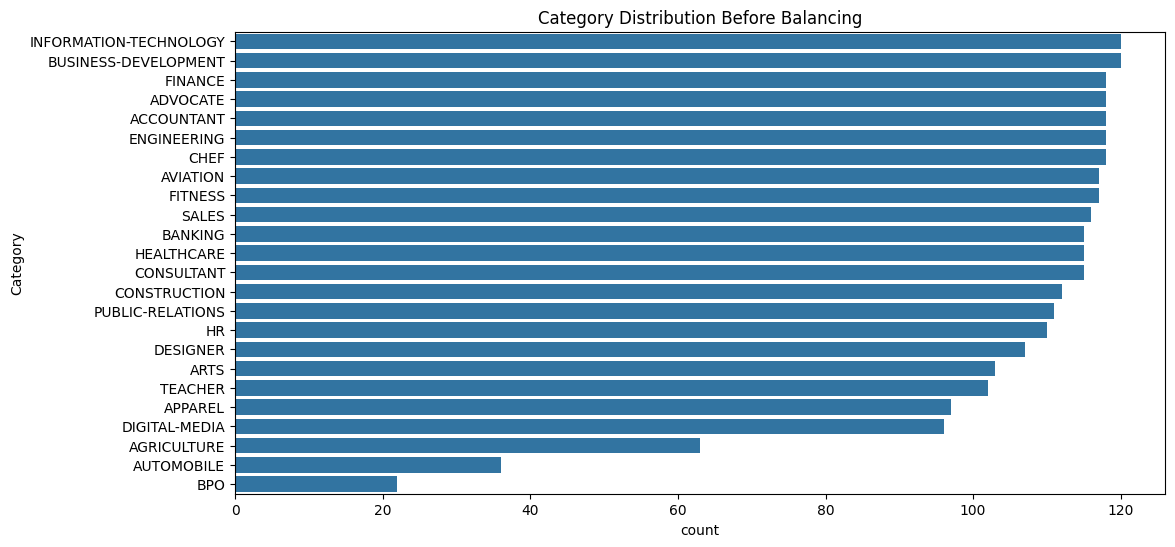

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of resumes per category
plt.figure(figsize=(12, 6))
sns.countplot(y=combined_data["Category"], order=combined_data["Category"].value_counts().index)
plt.title("Category Distribution Before Balancing")
plt.show()

# Print counts
print(combined_data["Category"].value_counts())


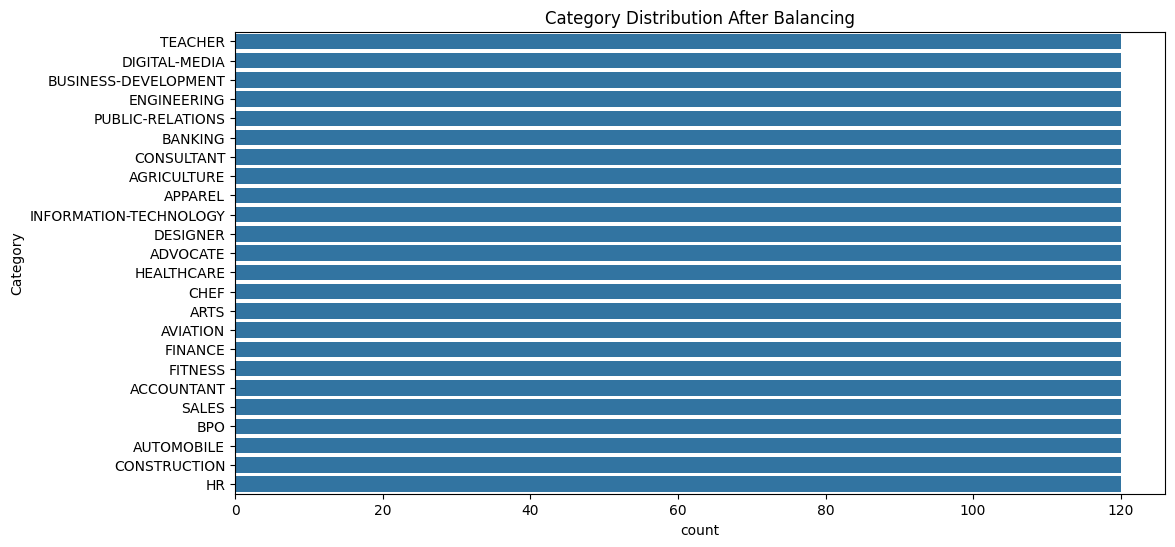

Category
TEACHER                   120
DIGITAL-MEDIA             120
BUSINESS-DEVELOPMENT      120
ENGINEERING               120
PUBLIC-RELATIONS          120
BANKING                   120
CONSULTANT                120
AGRICULTURE               120
APPAREL                   120
INFORMATION-TECHNOLOGY    120
DESIGNER                  120
ADVOCATE                  120
HEALTHCARE                120
CHEF                      120
ARTS                      120
AVIATION                  120
FINANCE                   120
FITNESS                   120
ACCOUNTANT                120
SALES                     120
BPO                       120
AUTOMOBILE                120
CONSTRUCTION              120
HR                        120
Name: count, dtype: int64


In [21]:
from sklearn.utils import resample

# Separate classes
dfs = [combined_data[combined_data["Category"] == cat] for cat in combined_data["Category"].unique()]

# Find the maximum class size
max_size = max(len(df) for df in dfs)

# Oversample each class to match the size of the largest class
balanced_data = pd.concat([
    resample(df, replace=True, n_samples=max_size, random_state=42)
    for df in dfs
])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Plot the balanced classes
plt.figure(figsize=(12, 6))
sns.countplot(y=balanced_data["Category"], order=balanced_data["Category"].value_counts().index)
plt.title("Category Distribution After Balancing")
plt.show()

# Check new counts
print(balanced_data["Category"].value_counts())


In [22]:
# Add word count and unique word count
balanced_data["Word_Count"] = balanced_data["Cleaned_Text"].apply(lambda x: len(x.split()))
balanced_data["Unique_Word_Count"] = balanced_data["Cleaned_Text"].apply(lambda x: len(set(x.split())))

# Display
print(balanced_data[["Cleaned_Text", "Word_Count", "Unique_Word_Count"]].head())


                                        Cleaned_Text  Word_Count  \
0  teacher professional summary exceptional speci...         657   
1  sr leave administrative specialist professiona...         627   
2  construction worker summary motivated hard wor...         153   
3  senior special investigator summary work succe...         456   
4  claims subject matter expert professional summ...         910   

   Unique_Word_Count  
0                379  
1                336  
2                109  
3                207  
4                414  


In [23]:
# Define a simple list of skills/keywords
skills = ["python", "java", "sql", "excel", "machine learning", "nursing", "cloud", "project management"]

# Count occurrences of each skill in the cleaned text
def count_skills(text):
    return sum(1 for skill in skills if skill in text)

balanced_data["Skill_Count"] = balanced_data["Cleaned_Text"].apply(count_skills)

# Show results
print(balanced_data[["Cleaned_Text", "Skill_Count"]].head())


                                        Cleaned_Text  Skill_Count
0  teacher professional summary exceptional speci...            1
1  sr leave administrative specialist professiona...            0
2  construction worker summary motivated hard wor...            1
3  senior special investigator summary work succe...            0
4  claims subject matter expert professional summ...            2


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(balanced_data["Cleaned_Text"])

# Show shape of transformed data
print(f"Shape of TF-IDF matrix: {X.shape}")


Shape of TF-IDF matrix: (2880, 5000)


In [25]:
from sklearn.model_selection import train_test_split

# Target variable (categories)
y = balanced_data["Category"]

# Splitting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (2304, 5000)
Testing set size: (576, 5000)


In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Test accuracy
print(f"Training Accuracy: {model.score(X_train, y_train) * 100:.2f}%")
print(f"Testing Accuracy: {model.score(X_test, y_test) * 100:.2f}%")


Training Accuracy: 90.67%
Testing Accuracy: 77.60%


Classification Report:
                        precision    recall  f1-score   support

            ACCOUNTANT       0.73      1.00      0.84        19
              ADVOCATE       0.83      0.63      0.72        30
           AGRICULTURE       0.86      0.79      0.83        24
               APPAREL       0.79      0.71      0.75        21
                  ARTS       0.76      0.57      0.65        28
            AUTOMOBILE       0.60      0.86      0.71        14
              AVIATION       0.86      0.79      0.83        24
               BANKING       0.78      0.74      0.76        19
                   BPO       1.00      0.85      0.92        27
  BUSINESS-DEVELOPMENT       0.77      0.69      0.73        29
                  CHEF       0.83      0.83      0.83        12
          CONSTRUCTION       1.00      0.92      0.96        25
            CONSULTANT       0.67      0.45      0.54        31
              DESIGNER       0.96      0.83      0.89        30
         DIGITAL

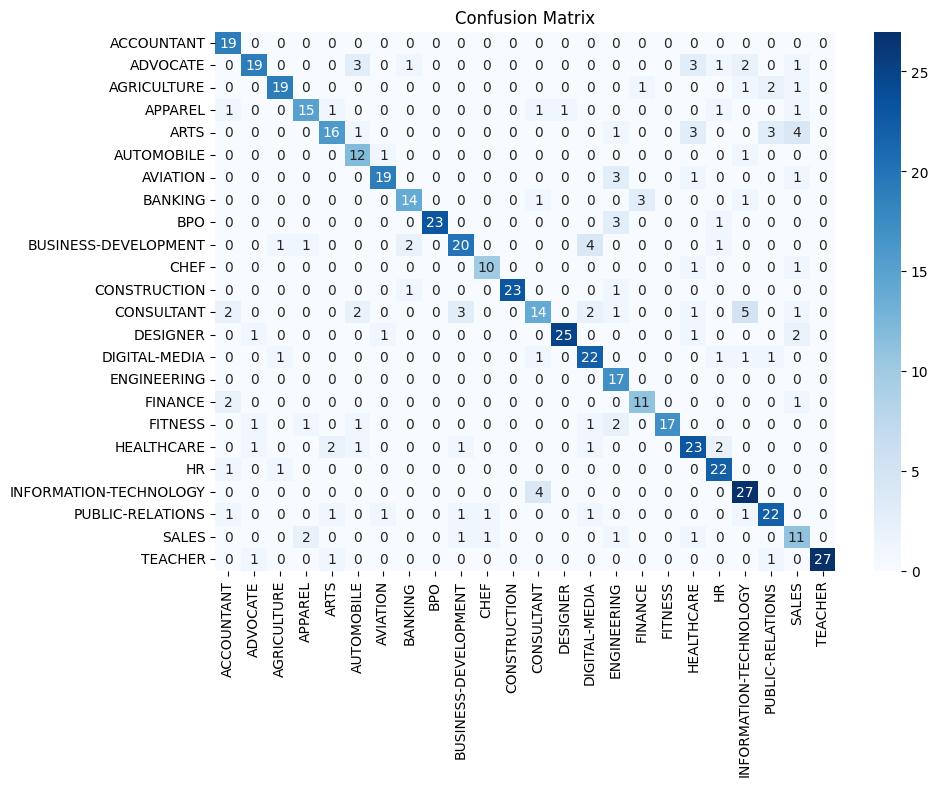

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.show()


In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize and fit label encoder on y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # ensure test labels match training classes


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [300, 500, 1000]}

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Best params and accuracy
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")

# Test the best model
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test_encoded)
print(f"Testing Accuracy with Tuned Model: {test_accuracy * 100:.2f}%")


Best Hyperparameters: {'C': 100, 'max_iter': 300}
Best Cross-Validation Accuracy: 86.33%
Testing Accuracy with Tuned Model: 88.72%


In [30]:
import joblib

# Save the trained model and label encoder
joblib.dump(best_model, 'logistic_regression_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
# Save the trained TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("TF-IDF Vectorizer saved successfully!")

print("Model and Label Encoder saved!")


TF-IDF Vectorizer saved successfully!
Model and Label Encoder saved!


In [34]:
import PyPDF2
import joblib

# Load the model and vectorizer
model = joblib.load('logistic_regression_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text() or ''
    return text

# Predict the category from PDF text
def predict_category_from_pdf(pdf_path):
    text = extract_text_from_pdf(pdf_path)
    text_vector = vectorizer.transform([text])

    # Predict encoded category
    predicted_category_encoded = model.predict(text_vector)[0]

    try:
        predicted_category = label_encoder.inverse_transform([predicted_category_encoded])[0]
        print(f"Predicted Category: {predicted_category}")
    except ValueError:
        print("Error: Predicted category not found in LabelEncoder classes.")

# Example usage
pdf_path = '/content/Doctor_CV.pdf'  # Replace with your CV file path
predict_category_from_pdf(pdf_path)


Predicted Category: HEALTHCARE
